# N皇后问题求解

在 N×N 的棋盘上放置 N 个皇后，使得它们互不攻击（即任意两个皇后不能在同一行、同一
列或同一对角线上）。编写程序，对给定的正整数 N（N≥4），输出所有可能的解（或至少一
个解），并分析算法效率

In [15]:
from typing import List

class NQueensSolver:
    def __init__(self, n: int, only_one: bool = False):
        """
        初始化 N 皇后求解器
        :param n: 棋盘大小（N×N）
        :param only_one: 是否只寻找一个解
        """
        if n < 4:
            raise ValueError("N 必须大于等于 4")
        self.n = n
        self.only_one = only_one
        self.solutions: List[List[str]] = []  # 存储所有解
        self.col = [-1] * n  # col[i] 表示第 i 行皇后放置的列
        self.used_cols = set()      # 已使用的列
        self.used_diag1 = set()     # 已使用的左对角线（r + c）
        self.used_diag2 = set()     # 已使用的右对角线（r - c）

    def solve(self) -> List[List[str]]:
        """
        开始求解 N 皇后问题
        :return: 所有合法的皇后放置方案
        """
        self._dfs(0)
        return self.solutions

    def _dfs(self, row: int) -> bool:
        """
        回溯搜索主函数
        :param row: 当前正在处理的行号
        :return: 若 only_one 为 True，找到一个解后返回 False 提前终止
        """
        if row == self.n:
            # 所有皇后成功放置，记录解
            board = ['.' * c + 'Q' + '.' * (self.n - c - 1) for c in self.col]
            self.solutions.append(board)
            return not self.only_one

        for c in range(self.n):
            # 检查列和两个对角线是否冲突
            if c in self.used_cols or (row + c) in self.used_diag1 or (row - c) in self.used_diag2:
                continue

            # 放置皇后并标记当前位置
            self.col[row] = c
            self.used_cols.add(c)
            self.used_diag1.add(row + c)
            self.used_diag2.add(row - c)

            # 递归处理下一行
            if not self._dfs(row + 1) and self.only_one:
                return False  # 如果只需要一个解，则提前退出

            # 回溯，撤销当前放置
            self.used_cols.remove(c)
            self.used_diag1.remove(row + c)
            self.used_diag2.remove(row - c)
        return True

    def display(self):
        """
        输出解的棋盘布局
        """
        for idx, solution in enumerate(self.solutions):
            print(f"解 {idx + 1}:")
            for row in solution:
                print(row)
            print()
            if self.only_one:
                break  # 如果只需要一个解，则输出第一个后退出


def main():
    """
    主函数：用户交互输入 N 和输出解
    """
    while True:
        try:
            n = int(input("请输入N(N >= 4)："))
            if n >= 4:
                break
            else:
                print("请重新输入一个不小于4的整数")
        except ValueError:
            print("输入格式错误，请输入整数")

    choice = input("是否只需要一个解？（键入Y表示只要一个）：").strip().upper()
    only_one = (choice == 'Y')

    # 创建解算器并执行
    solver = NQueensSolver(n, only_one)
    solver.solve()
    print(f"共找到 {len(solver.solutions)} 个解。\n")
    solver.display()


if __name__ == '__main__':
    main()

共找到 92 个解。

解 1:
Q.......
....Q...
.......Q
.....Q..
..Q.....
......Q.
.Q......
...Q....

解 2:
Q.......
.....Q..
.......Q
..Q.....
......Q.
...Q....
.Q......
....Q...

解 3:
Q.......
......Q.
...Q....
.....Q..
.......Q
.Q......
....Q...
..Q.....

解 4:
Q.......
......Q.
....Q...
.......Q
.Q......
...Q....
.....Q..
..Q.....

解 5:
.Q......
...Q....
.....Q..
.......Q
..Q.....
Q.......
......Q.
....Q...

解 6:
.Q......
....Q...
......Q.
Q.......
..Q.....
.......Q
.....Q..
...Q....

解 7:
.Q......
....Q...
......Q.
...Q....
Q.......
.......Q
.....Q..
..Q.....

解 8:
.Q......
.....Q..
Q.......
......Q.
...Q....
.......Q
..Q.....
....Q...

解 9:
.Q......
.....Q..
.......Q
..Q.....
Q.......
...Q....
......Q.
....Q...

解 10:
.Q......
......Q.
..Q.....
.....Q..
.......Q
....Q...
Q.......
...Q....

解 11:
.Q......
......Q.
....Q...
.......Q
Q.......
...Q....
.....Q..
..Q.....

解 12:
.Q......
.......Q
.....Q..
Q.......
..Q.....
....Q...
......Q.
...Q....

解 13:
..Q.....
Q.......
......Q.
....Q...
.......

## 时间分析

记录 N=4 至 N=12 时的运行时间，绘制时间增长曲线

N=4, 用时: 0.00000 秒，解数: 2
N=5, 用时: 0.00000 秒，解数: 10
N=6, 用时: 0.00000 秒，解数: 4
N=7, 用时: 0.00200 秒，解数: 40
N=8, 用时: 0.00500 秒，解数: 92
N=9, 用时: 0.02996 秒，解数: 352
N=10, 用时: 0.09952 秒，解数: 724
N=11, 用时: 0.45604 秒，解数: 2680
N=12, 用时: 2.75784 秒，解数: 14200


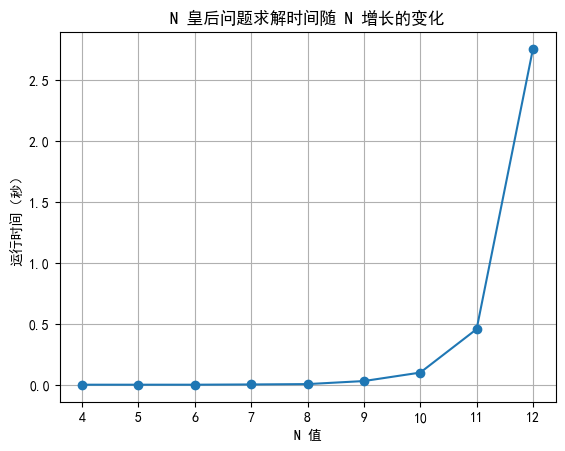

In [5]:
import time
import matplotlib.pyplot as plt

# 设置 matplotlib 字体为黑体，支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False     # 避免负号显示为乱码
plt.figure(facecolor='white')                  # 设置图像背景为白色

def test_solver_speed():
    """
    测试 NQueensSolver 在不同 N 值下的运行时间，
    并绘制运行时间随 N 增长的趋势图。
    """
    ns = list(range(4, 13))  # 测试从 N=4 到 N=12
    times = []               # 存储对应的运行时间

    for n in ns:
        solver = NQueensSolver(n)   # 初始化求解器
        start = time.time()         # 开始计时
        solver.solve()              # 执行求解
        end = time.time()           # 结束计时
        runtime = end - start       # 计算用时
        times.append(runtime)       # 添加到时间列表中

        # 控制台输出每个 N 的用时与解的个数
        print(f"N={n}, 用时: {runtime:.5f} 秒，解数: {len(solver.solutions)}")

    # 绘制运行时间曲线
    plt.plot(ns, times, marker='o')
    plt.xlabel("N 值")             
    plt.ylabel("运行时间（秒）")     
    plt.title("N 皇后问题求解时间随 N 增长的变化")  
    plt.grid(True)                 
    plt.show()                      


# 主程序入口
if __name__ == '__main__':
    test_solver_speed()

## 时间复杂度分析
现在使用的剪枝策略包括列、两个对角线的集合检测，显著减少了状态空间

理论上，回溯搜索的时间复杂度为 $O(N!)$，但由于剪枝效果显著，实际运行时间远小于理论复杂度

实验结果显示，当 $N$ 从 4 增加到 12 时，运行时间呈指数增长趋势，验证了回溯法的指数级增长特性

N=4, 用时: 0.00000s, 解数: 2
N=5, 用时: 0.00000s, 解数: 10
N=6, 用时: 0.00100s, 解数: 4
N=7, 用时: 0.00100s, 解数: 40
N=8, 用时: 0.00299s, 解数: 92
N=9, 用时: 0.01395s, 解数: 352
N=10, 用时: 0.05609s, 解数: 724
N=11, 用时: 0.30161s, 解数: 2680
N=12, 用时: 1.52665s, 解数: 14200


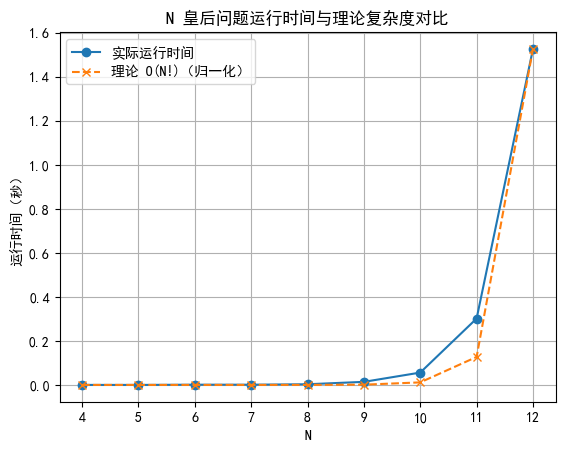

In [24]:
import math
import time
import matplotlib.pyplot as plt

def plot_with_theoretical():
    """
    测试 NQueensSolver 在 N=4 到 12 时的运行时间，
    并与理论复杂度 O(N!) 进行对比（归一化后绘图）。
    """
    ns = list(range(4, 13))  # N 从 4 到 12
    times = []               # 实际运行时间记录列表
    theory = []              # 理论复杂度值（N!）

    for n in ns:
        solver = NQueensSolver(n)
        start = time.time()         # 开始计时
        solver.solve()              # 执行求解
        end = time.time()           # 结束计时
        runtime = end - start       # 实际用时
        times.append(runtime)
        theory.append(math.factorial(n))  # 理论时间复杂度：N!

        # 输出每个 N 的运行时间和解数
        print(f"N={n}, 用时: {runtime:.5f}s, 解数: {len(solver.solutions)}")

    # 为了让理论曲线与实际曲线位于同一图像范围内，需要归一化
    max_time = max(times)
    theory_norm = [x / max(theory) * max_time for x in theory]  # 归一化后的理论值

    # 绘制曲线
    plt.plot(ns, times, marker='o', label="实际运行时间")
    plt.plot(ns, theory_norm, marker='x', linestyle='--', label="理论 O(N!)（归一化）")
    plt.xlabel("N")                  
    plt.ylabel("运行时间（秒）")      
    plt.title("N 皇后问题运行时间与理论复杂度对比") 
    plt.legend()                     
    plt.grid(True)                    
    plt.show()                       

# 主程序入口
if __name__ == '__main__':
    plot_with_theoretical()


注： 这里的理论值是**压缩后的比例值**，只是为了方便在一张图上可视化它的增长趋势，而不是它的绝对运行时间

因为其不完成归一化很难画进一张图中

## 位运算优化策略

这里通过位运算剪枝，对应定义新类NQueenSolver1进行计算

In [19]:
from typing import List

class NQueensSolver1:
    def __init__(self, n: int, only_one: bool = False):
        if n < 4:
            raise ValueError("N 必须大于等于 4")
        self.n = n
        self.only_one = only_one
        self.solutions: List[List[str]] = []
        self.col_positions = [-1] * n  # 记录每一行皇后所在的列

    def solve(self) -> List[List[str]]:
        self._dfs(0, 0, 0, 0)
        return self.solutions

    def _dfs(self, row: int, cols: int, ld: int, rd: int) -> bool:
        if row == self.n:
            board = ['.' * c + 'Q' + '.' * (self.n - c - 1) for c in self.col_positions]
            self.solutions.append(board)
            return not self.only_one

        # 可放置的位置掩码
        bits = (~(cols | ld | rd)) & ((1 << self.n) - 1)
        while bits:
            # 提取最低位的 1
            pick = bits & -bits
            col = (pick - 1).bit_count()  # 计算当前列号

            self.col_positions[row] = col

            if not self._dfs(
                row + 1,
                cols | pick,
                (ld | pick) << 1,
                (rd | pick) >> 1
            ) and self.only_one:
                return False

            # 去除当前最低位 1（相当于尝试下一个位置）
            bits &= bits - 1
        return True

    def display(self):
        for idx, solution in enumerate(self.solutions):
            print(f"解 {idx + 1}:")
            for row in solution:
                print(row)
            print()
            if self.only_one:
                break
def main():
    while True:
        try:
            n = int(input("请输入N(N >= 4)："))
            if n >= 4:
                break
            else:
                print("请重新输入一个不小于4的整数")
        except ValueError:
            print("输入格式错误，请输入整数")

    choice = input("是否只需要一个解？（键入Y表示只要一个）：").strip().upper()
    only_one = (choice == 'Y')

    solver = NQueensSolver(n, only_one)
    solver.solve()
    print(f"共找到 {len(solver.solutions)} 个解。\n")
    solver.display()

if __name__ == "__main__":
    main()


共找到 724 个解。

解 1:
Q.........
..Q.......
.....Q....
.......Q..
.........Q
....Q.....
........Q.
.Q........
...Q......
......Q...

解 2:
Q.........
..Q.......
.....Q....
........Q.
......Q...
.........Q
...Q......
.Q........
....Q.....
.......Q..

解 3:
Q.........
..Q.......
.....Q....
........Q.
......Q...
.........Q
...Q......
.Q........
.......Q..
....Q.....

解 4:
Q.........
..Q.......
........Q.
......Q...
.........Q
...Q......
.Q........
....Q.....
.......Q..
.....Q....

解 5:
Q.........
...Q......
.....Q....
........Q.
..Q.......
.........Q
.......Q..
.Q........
....Q.....
......Q...

解 6:
Q.........
...Q......
......Q...
.........Q
.Q........
........Q.
....Q.....
..Q.......
.......Q..
.....Q....

解 7:
Q.........
...Q......
......Q...
.........Q
..Q.......
........Q.
.Q........
....Q.....
.......Q..
.....Q....

解 8:
Q.........
...Q......
......Q...
.........Q
.....Q....
........Q.
.Q........
....Q.....
..Q.......
.......Q..

解 9:
Q.........
...Q......
......Q...
.........Q
.......Q..

## 优化后的时间计算：

N=4, 用时: 0.00000s, 解数: 2
N=5, 用时: 0.00000s, 解数: 10
N=6, 用时: 0.00000s, 解数: 4
N=7, 用时: 0.00000s, 解数: 40
N=8, 用时: 0.00252s, 解数: 92
N=9, 用时: 0.00517s, 解数: 352
N=10, 用时: 0.02417s, 解数: 724
N=11, 用时: 0.11267s, 解数: 2680
N=12, 用时: 0.59401s, 解数: 14200


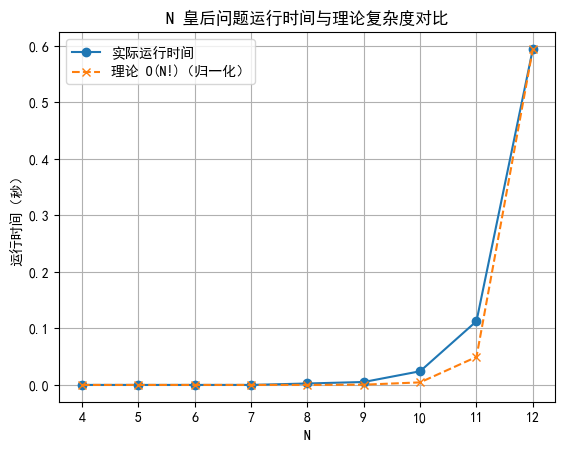

In [23]:

def plot_with_theoretical():
    """
    测试 NQueensSolver1 在 N=4 到 12 时的运行时间，
    并与理论复杂度 O(N!) 进行对比（归一化后绘图）。
    """
    ns = list(range(4, 13))  # N 从 4 到 12
    times = []               # 实际运行时间记录列表
    theory = []              # 理论复杂度值（N!）

    for n in ns:
        solver = NQueensSolver1(n)
        start = time.time()         # 开始计时
        solver.solve()              # 执行求解
        end = time.time()           # 结束计时
        runtime = end - start       # 实际用时
        times.append(runtime)
        theory.append(math.factorial(n))  # 理论时间复杂度：N!

        # 输出每个 N 的运行时间和解数
        print(f"N={n}, 用时: {runtime:.5f}s, 解数: {len(solver.solutions)}")

    # 为了让理论曲线与实际曲线位于同一图像范围内，需要归一化
    max_time = max(times)
    theory_norm = [x / max(theory) * max_time for x in theory]  # 归一化后的理论值

    # 绘制曲线
    plt.plot(ns, times, marker='o', label="实际运行时间")
    plt.plot(ns, theory_norm, marker='x', linestyle='--', label="理论 O(N!)（归一化）")
    plt.xlabel("N")                  
    plt.ylabel("运行时间（秒）")      
    plt.title("N 皇后问题运行时间与理论复杂度对比") 
    plt.legend()                     
    plt.grid(True)                    
    plt.show()                       

# 主程序入口
if __name__ == '__main__':
    plot_with_theoretical()


我们将此计算的时间结果与不使用优化的过程对应，不难看出：

使用位运算后，运行时间减少，本质是其显著减少了算法时间复杂度的常数因子